In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

from scipy.stats import skew, kurtosis

import seaborn as sns

import statistics as stat

from statsmodels.formula.api import ols

#Loading the CSV of the default dataset
df = pd.read_csv(r'C:\Users\mmorg\Desktop\D208 Assessment Files\medical_clean.csv')

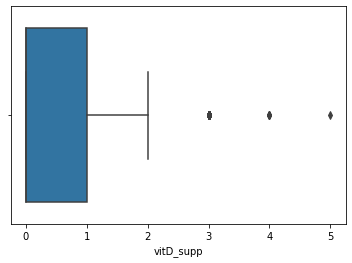

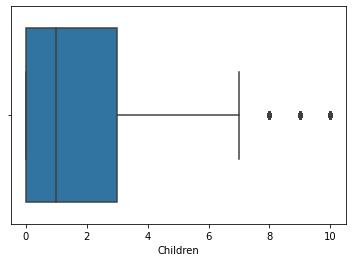

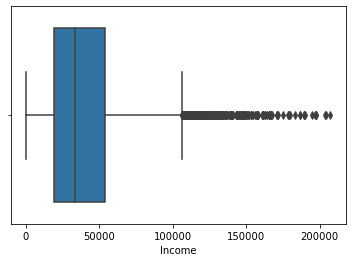

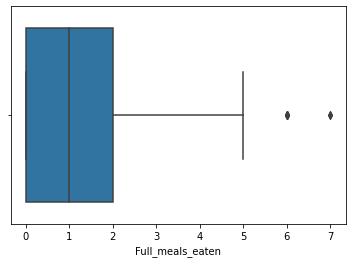

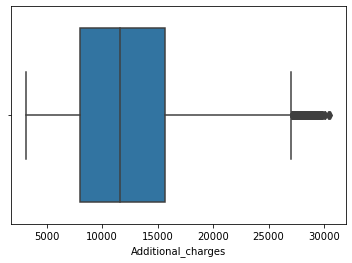

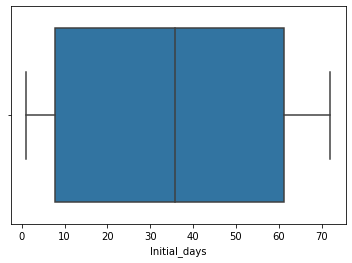

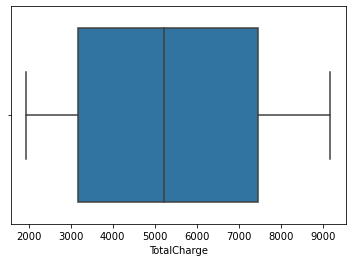

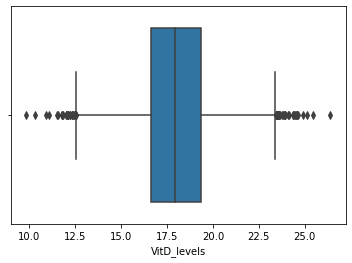

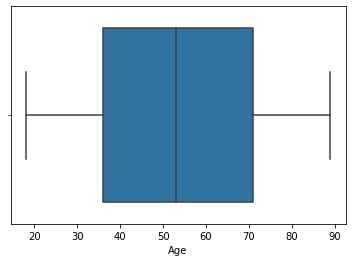

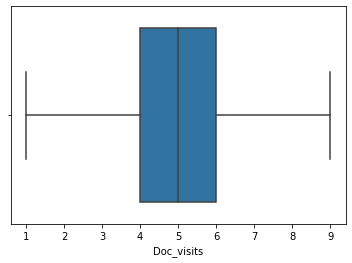

In [3]:
#Detection of outliers
boxplot=sns.boxplot(x='vitD_supp',data=df)
plt.show()
boxplot=sns.boxplot(x='Children',data=df)
plt.show()
boxplot=sns.boxplot(x='Income',data=df)
plt.show()
boxplot=sns.boxplot(x='Full_meals_eaten',data=df)
plt.show()
boxplot=sns.boxplot(x='Additional_charges',data=df)
plt.show()
boxplot=sns.boxplot(x='Initial_days',data=df)
plt.show()
boxplot=sns.boxplot(x='TotalCharge',data=df)
plt.show()
boxplot=sns.boxplot(x='VitD_levels',data=df)
plt.show()
boxplot=sns.boxplot(x='Age',data=df)
plt.show()
boxplot=sns.boxplot(x='Doc_visits',data=df)
plt.show()

In [4]:
#Data Wrangling; turn categorical values into quantitative data
df['ReAdmis_numeric'] = df['ReAdmis']
dict_ReAdmis = {"ReAdmis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_ReAdmis, inplace=True)

df['Soft_drink_numeric'] = df['Soft_drink']
dict_Soft_drink = {"Soft_drink_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_Soft_drink, inplace=True)

df['HighBlood_numeric'] = df['HighBlood']
dict_HighBlood = {"HighBlood_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_HighBlood, inplace=True)

df['Stroke_numeric'] = df['Stroke']
dict_stroke = {"Stroke_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_stroke, inplace=True)

df['Arthritis_numeric'] = df['Arthritis']
dict_arthritis = {"Arthritis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_arthritis, inplace=True)

df['Diabetes_numeric'] = df['Diabetes']
dict_diabetes = {"Diabetes_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_diabetes, inplace=True)

df['Hyperlipidemia_numeric'] = df['Hyperlipidemia']
dict_hyperlipidemia = {"Hyperlipidemia_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_hyperlipidemia, inplace=True)

df['BackPain_numeric'] = df['BackPain']
dict_backpain = {"BackPain_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_backpain, inplace=True)

df['Allergic_rhinitis_numeric'] = df['Allergic_rhinitis']
dict_allergies = {"Allergic_rhinitis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_allergies, inplace=True)

df['Reflux_esophagitis_numeric'] = df['Reflux_esophagitis']
dict_reflux = {"Reflux_esophagitis_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_reflux, inplace=True)

df['Asthma_numeric'] = df['Asthma']
dict_asthma = {"Asthma_numeric": {"No": 0, "Yes": 1}}
df.replace(dict_asthma, inplace=True)

df = pd.get_dummies(df, columns=["Marital", "Services", "Gender", "Initial_admin", "Complication_risk"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 74 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            10000 non-null  int64  
 1   Customer_id                          10000 non-null  object 
 2   Interaction                          10000 non-null  object 
 3   UID                                  10000 non-null  object 
 4   City                                 10000 non-null  object 
 5   State                                10000 non-null  object 
 6   County                               10000 non-null  object 
 7   Zip                                  10000 non-null  int64  
 8   Lat                                  10000 non-null  float64
 9   Lng                                  10000 non-null  float64
 10  Population                           10000 non-null  int64  
 11  Area                         

In [5]:
df = df.rename({'Initial_admin_Elective Admission': 'Initial_admin_Elective_Admission', 
                'Initial_admin_Emergency Admission': 'Initial_admin_Emergency_Admission', 
                'Initial_admin_Observation Admission': 'Initial_admin_Observation_Admission',
                'Marital_Never Married': 'Marital_Never_Married',
                'Services_Blood Work': 'Services_Blood_Work',
                'Services_CT Scan': 'Services_CT_Scan'}, axis ='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 74 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            10000 non-null  int64  
 1   Customer_id                          10000 non-null  object 
 2   Interaction                          10000 non-null  object 
 3   UID                                  10000 non-null  object 
 4   City                                 10000 non-null  object 
 5   State                                10000 non-null  object 
 6   County                               10000 non-null  object 
 7   Zip                                  10000 non-null  int64  
 8   Lat                                  10000 non-null  float64
 9   Lng                                  10000 non-null  float64
 10  Population                           10000 non-null  int64  
 11  Area                         

In [6]:
##Univariate Stats Dataframe
def unistats(df):
    output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Numeric', 'Mean', 'Mode', 'Min', 'Median', 'Max', 'Std', 'Skew', 'Kurt'])
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col].mean(), df[col].mode().values[0], df[col].min(), df[col].median(), df[col].max(), df[col].std(), df[col].skew(), df[col].kurtosis()]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), '-', '-', '-', '-', '-', '-', '-', '-']
    return output_df.sort_values(by=['Numeric', 'Skew', 'Unique'], ascending=False)

df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'State', 'County', 'Job', 'Zip', 'TimeZone', 'Lat', 'Lng', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], inplace=True)
print(unistats(df))

                                     Count  Missing  Unique    Dtype  Numeric  \
Gender_Nonbinary                     10000        0       2    uint8     True   
Services_MRI                         10000        0       2    uint8     True   
Services_CT_Scan                     10000        0       2    uint8     True   
Population                           10000        0    5951    int64     True   
vitD_supp                            10000        0       6    int64     True   
Marital_Divorced                     10000        0       2    uint8     True   
Marital_Never_Married                10000        0       2    uint8     True   
Marital_Separated                    10000        0       2    uint8     True   
Stroke_numeric                       10000        0       2    int64     True   
Marital_Married                      10000        0       2    uint8     True   
Marital_Widowed                      10000        0       2    uint8     True   
Children                    

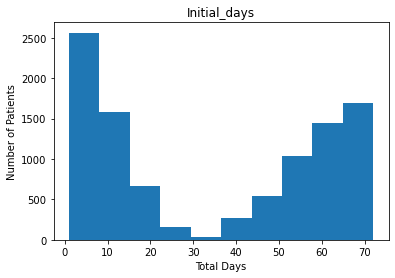

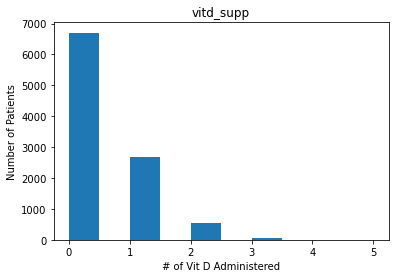

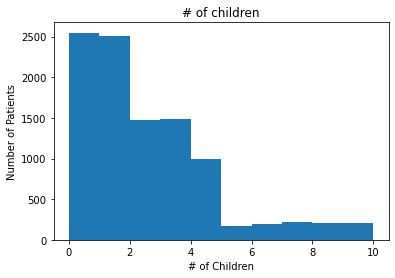

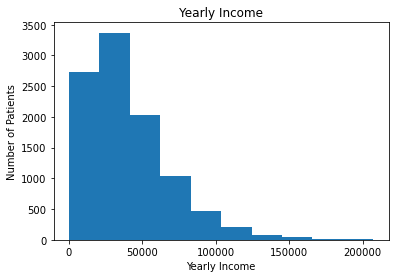

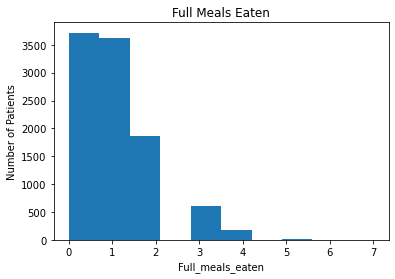

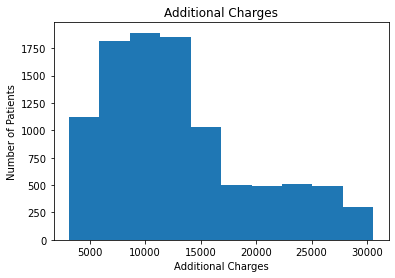

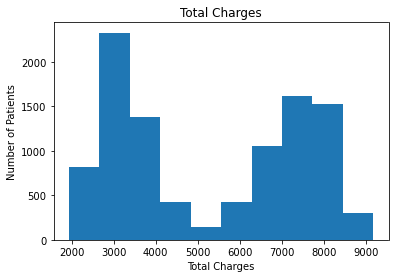

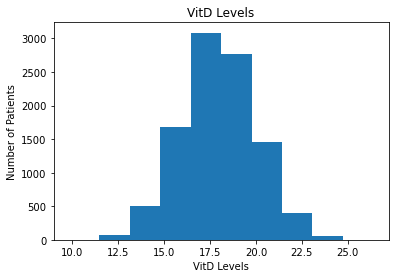

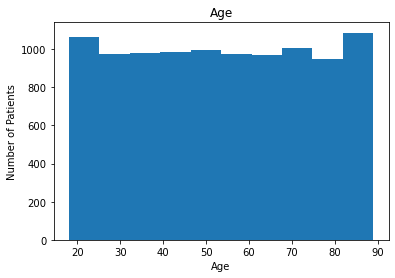

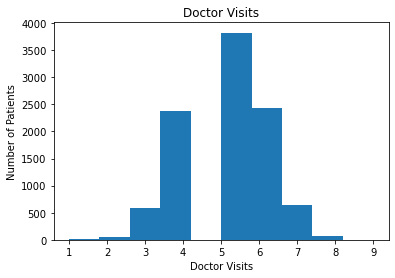

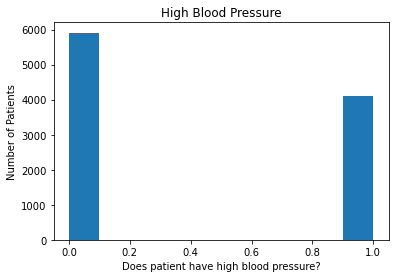

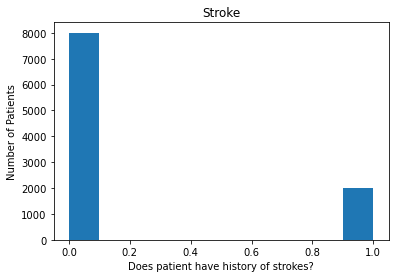

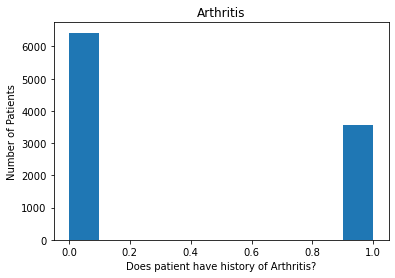

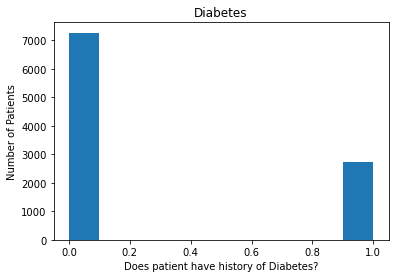

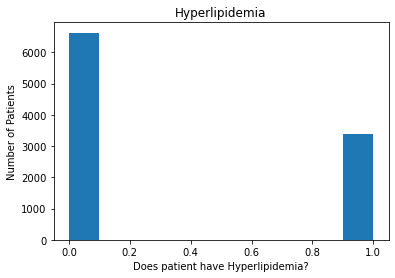

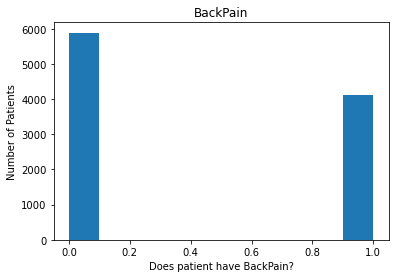

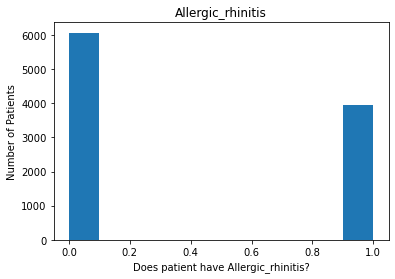

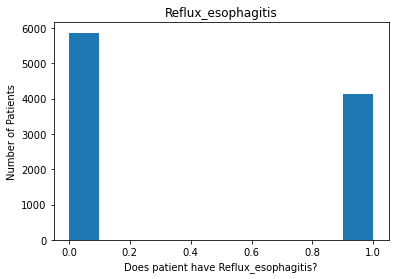

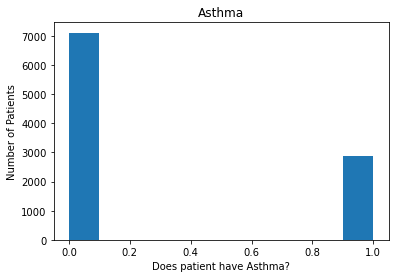

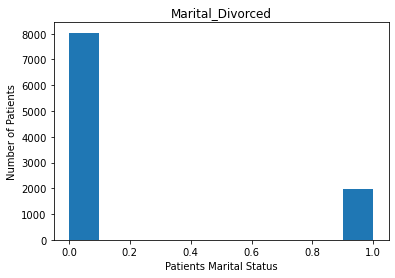

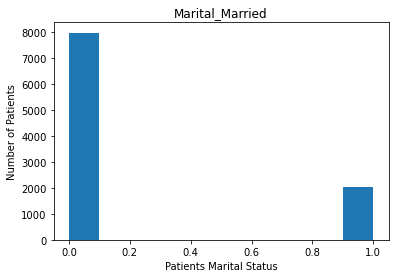

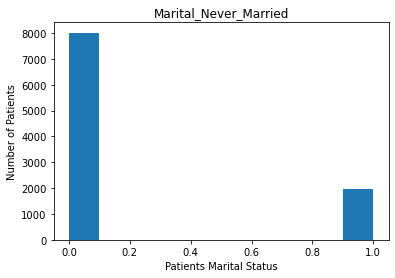

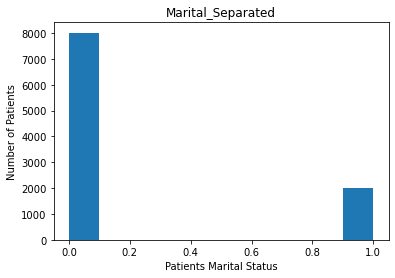

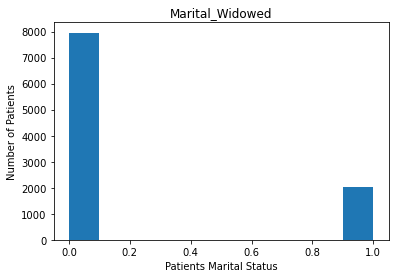

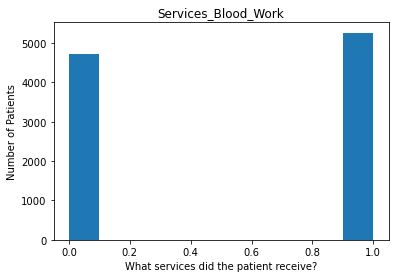

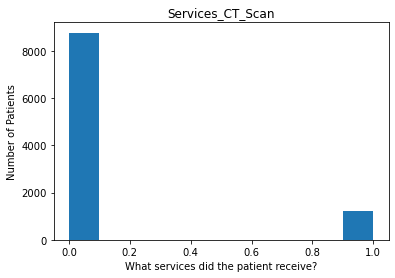

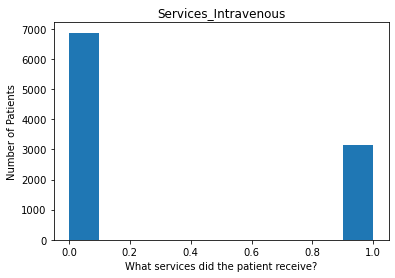

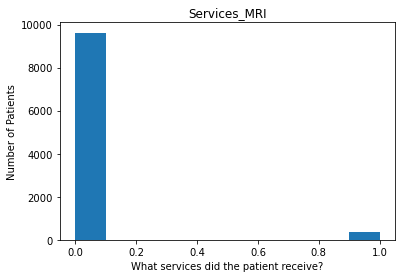

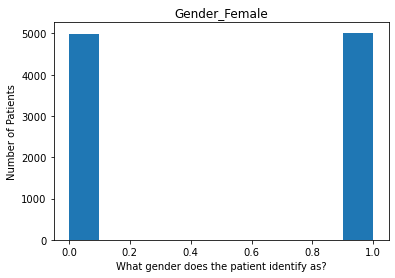

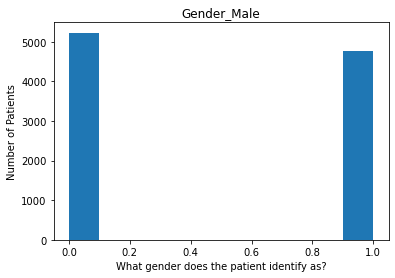

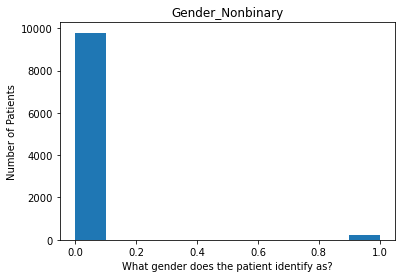

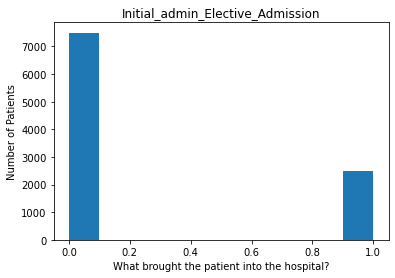

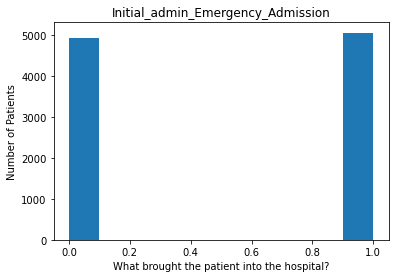

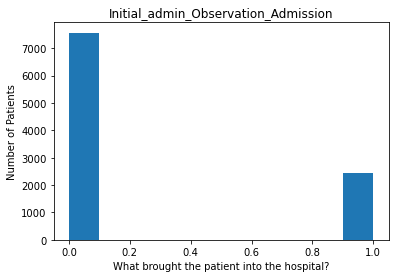

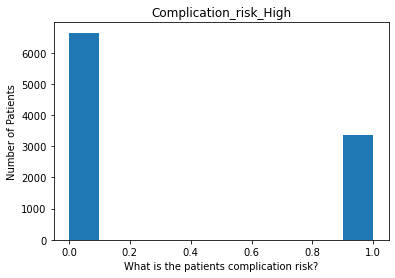

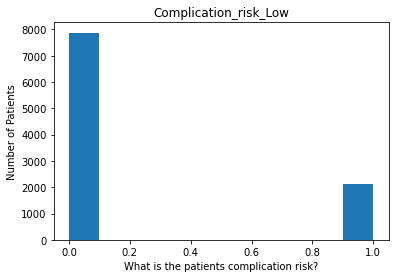

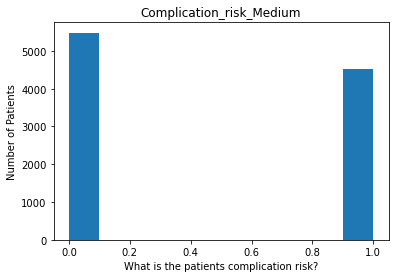

In [7]:
#Univariate Visualization
plt.hist(df.Initial_days)
plt.xlabel('Total Days')
plt.ylabel('Number of Patients')
plt.title('Initial_days')
plt.show()

plt.hist(df.vitD_supp)
plt.xlabel('# of Vit D Administered')
plt.ylabel('Number of Patients')
plt.title('vitd_supp')
plt.show()

plt.hist(df.Children)
plt.xlabel('# of Children')
plt.ylabel('Number of Patients')
plt.title('# of children')
plt.show()

plt.hist(df.Income)
plt.xlabel('Yearly Income')
plt.ylabel('Number of Patients')
plt.title('Yearly Income')
plt.show()

plt.hist(df.Full_meals_eaten)
plt.xlabel('Full_meals_eaten')
plt.ylabel('Number of Patients')
plt.title('Full Meals Eaten')
plt.show()

plt.hist(df.Additional_charges)
plt.xlabel('Additional Charges')
plt.ylabel('Number of Patients')
plt.title('Additional Charges')
plt.show()

plt.hist(df.TotalCharge)
plt.xlabel('Total Charges')
plt.ylabel('Number of Patients')
plt.title('Total Charges')
plt.show()

plt.hist(df.VitD_levels)
plt.xlabel('VitD Levels')
plt.ylabel('Number of Patients')
plt.title('VitD Levels')
plt.show()

plt.hist(df.Age)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age')
plt.show()

plt.hist(df.Doc_visits)
plt.xlabel('Doctor Visits')
plt.ylabel('Number of Patients')
plt.title('Doctor Visits')
plt.show()

plt.hist(df.HighBlood_numeric)
plt.xlabel('Does patient have high blood pressure?')
plt.ylabel('Number of Patients')
plt.title('High Blood Pressure')
plt.show()

plt.hist(df.Stroke_numeric)
plt.xlabel('Does patient have history of strokes?')
plt.ylabel('Number of Patients')
plt.title('Stroke')
plt.show()

plt.hist(df.Arthritis_numeric)
plt.xlabel('Does patient have history of Arthritis?')
plt.ylabel('Number of Patients')
plt.title('Arthritis')
plt.show()

plt.hist(df.Diabetes_numeric)
plt.xlabel('Does patient have history of Diabetes?')
plt.ylabel('Number of Patients')
plt.title('Diabetes')
plt.show()

plt.hist(df.Hyperlipidemia_numeric)
plt.xlabel('Does patient have Hyperlipidemia?')
plt.ylabel('Number of Patients')
plt.title('Hyperlipidemia')
plt.show()

plt.hist(df.BackPain_numeric)
plt.xlabel('Does patient have BackPain?')
plt.ylabel('Number of Patients')
plt.title('BackPain')
plt.show()

plt.hist(df.Allergic_rhinitis_numeric)
plt.xlabel('Does patient have Allergic_rhinitis?')
plt.ylabel('Number of Patients')
plt.title('Allergic_rhinitis')
plt.show()

plt.hist(df.Reflux_esophagitis_numeric)
plt.xlabel('Does patient have Reflux_esophagitis?')
plt.ylabel('Number of Patients')
plt.title('Reflux_esophagitis')
plt.show()

plt.hist(df.Asthma_numeric)
plt.xlabel('Does patient have Asthma?')
plt.ylabel('Number of Patients')
plt.title('Asthma')
plt.show()

plt.hist(df.Marital_Divorced)
plt.xlabel('Patients Marital Status')
plt.ylabel('Number of Patients')
plt.title('Marital_Divorced')
plt.show()

plt.hist(df.Marital_Married)
plt.xlabel('Patients Marital Status')
plt.ylabel('Number of Patients')
plt.title('Marital_Married')
plt.show()

plt.hist(df.Marital_Never_Married)
plt.xlabel('Patients Marital Status')
plt.ylabel('Number of Patients')
plt.title('Marital_Never_Married')
plt.show()

plt.hist(df.Marital_Separated)
plt.xlabel('Patients Marital Status')
plt.ylabel('Number of Patients')
plt.title('Marital_Separated')
plt.show()

plt.hist(df.Marital_Widowed)
plt.xlabel('Patients Marital Status')
plt.ylabel('Number of Patients')
plt.title('Marital_Widowed')
plt.show()

plt.hist(df.Services_Blood_Work)
plt.xlabel('What services did the patient receive?')
plt.ylabel('Number of Patients')
plt.title('Services_Blood_Work')
plt.show()

plt.hist(df.Services_CT_Scan)
plt.xlabel('What services did the patient receive?')
plt.ylabel('Number of Patients')
plt.title('Services_CT_Scan')
plt.show()

plt.hist(df.Services_Intravenous)
plt.xlabel('What services did the patient receive?')
plt.ylabel('Number of Patients')
plt.title('Services_Intravenous')
plt.show()

plt.hist(df.Services_MRI)
plt.xlabel('What services did the patient receive?')
plt.ylabel('Number of Patients')
plt.title('Services_MRI')
plt.show()

plt.hist(df.Gender_Female)
plt.xlabel('What gender does the patient identify as?')
plt.ylabel('Number of Patients')
plt.title('Gender_Female')
plt.show()

plt.hist(df.Gender_Male)
plt.xlabel('What gender does the patient identify as?')
plt.ylabel('Number of Patients')
plt.title('Gender_Male')
plt.show()

plt.hist(df.Gender_Nonbinary)
plt.xlabel('What gender does the patient identify as?')
plt.ylabel('Number of Patients')
plt.title('Gender_Nonbinary')
plt.show()

plt.hist(df.Initial_admin_Elective_Admission)
plt.xlabel('What brought the patient into the hospital?')
plt.ylabel('Number of Patients')
plt.title('Initial_admin_Elective_Admission')
plt.show()

plt.hist(df.Initial_admin_Emergency_Admission)
plt.xlabel('What brought the patient into the hospital?')
plt.ylabel('Number of Patients')
plt.title('Initial_admin_Emergency_Admission')
plt.show()

plt.hist(df.Initial_admin_Observation_Admission)
plt.xlabel('What brought the patient into the hospital?')
plt.ylabel('Number of Patients')
plt.title('Initial_admin_Observation_Admission')
plt.show()

plt.hist(df.Complication_risk_High)
plt.xlabel('What is the patients complication risk?')
plt.ylabel('Number of Patients')
plt.title('Complication_risk_High')
plt.show()

plt.hist(df.Complication_risk_Low)
plt.xlabel('What is the patients complication risk?')
plt.ylabel('Number of Patients')
plt.title('Complication_risk_Low')
plt.show()

plt.hist(df.Complication_risk_Medium)
plt.xlabel('What is the patients complication risk?')
plt.ylabel('Number of Patients')
plt.title('Complication_risk_Medium')
plt.show()

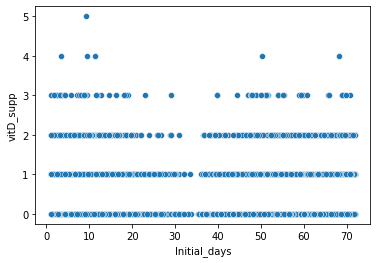

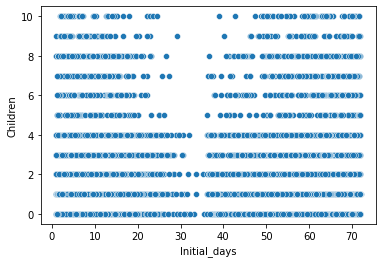

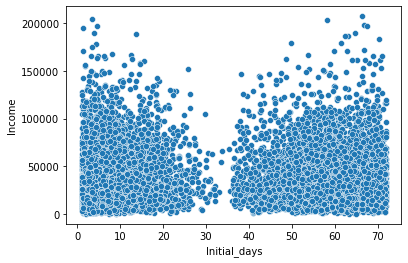

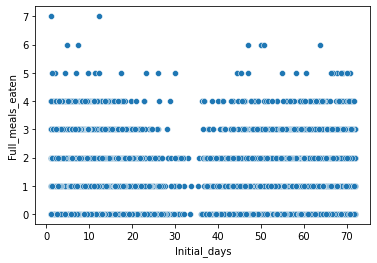

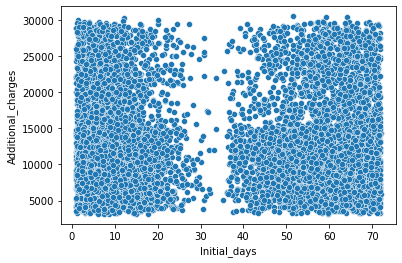

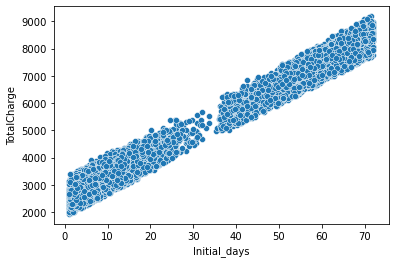

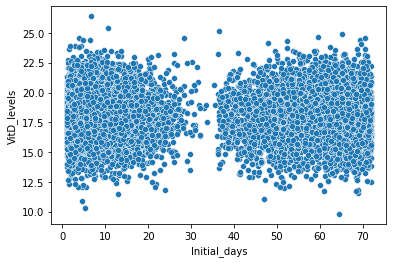

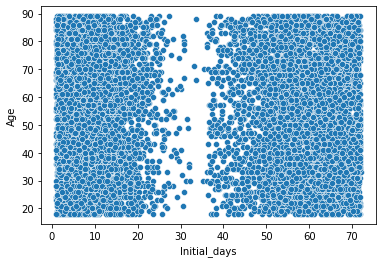

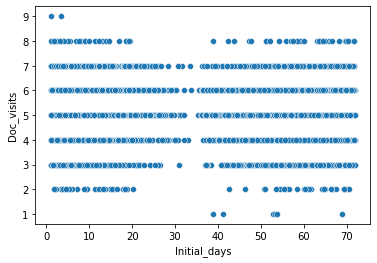

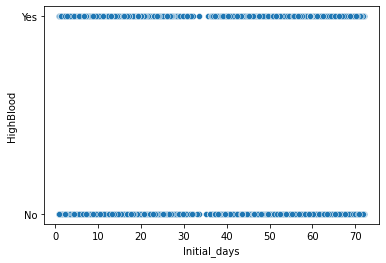

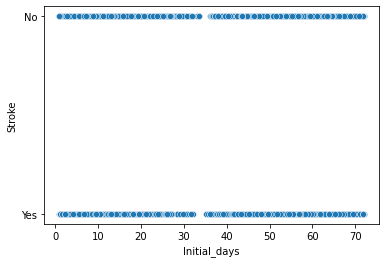

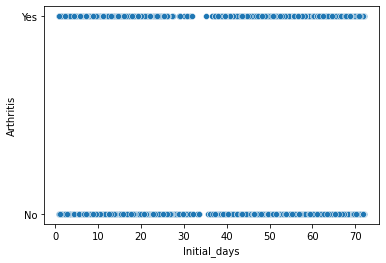

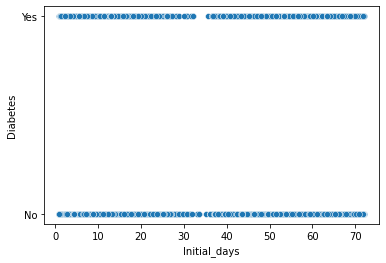

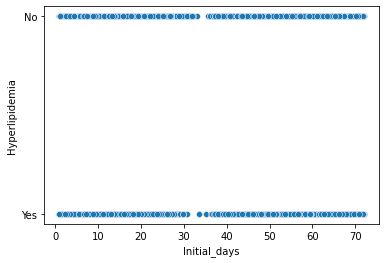

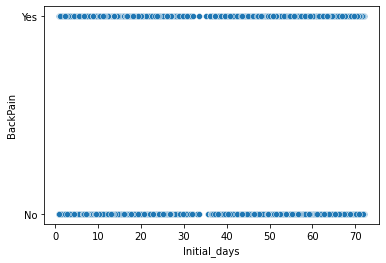

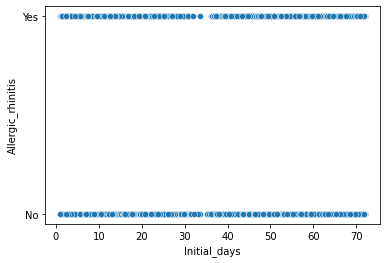

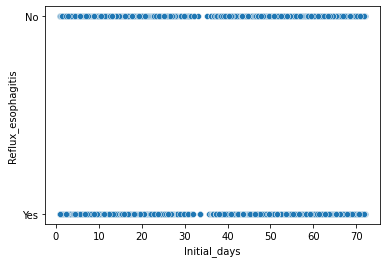

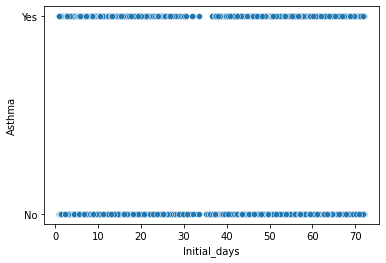

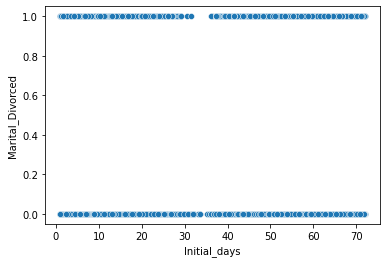

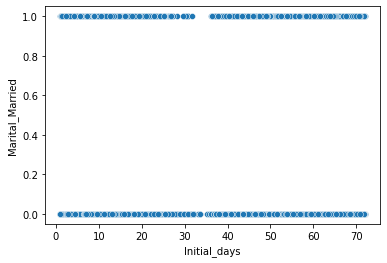

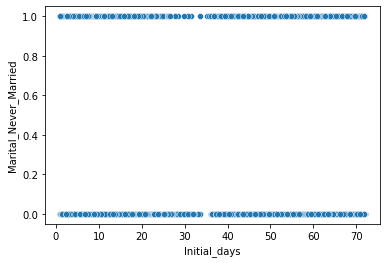

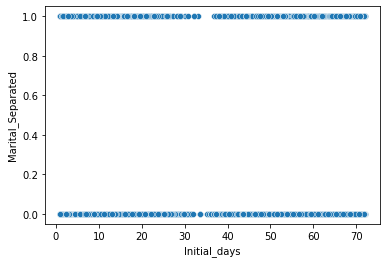

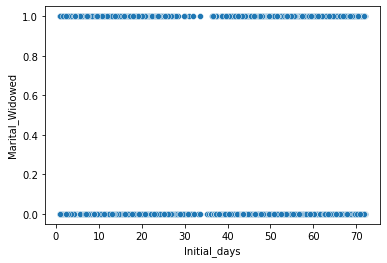

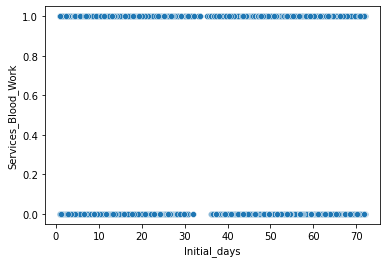

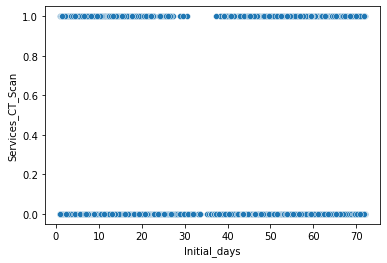

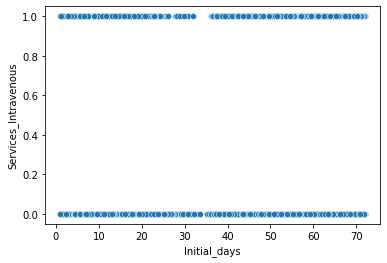

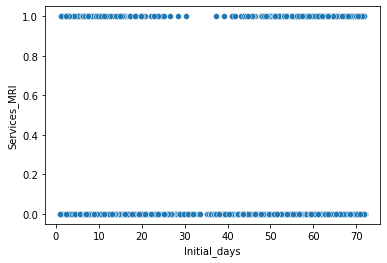

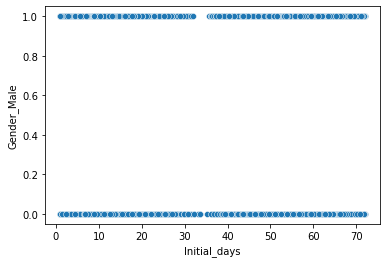

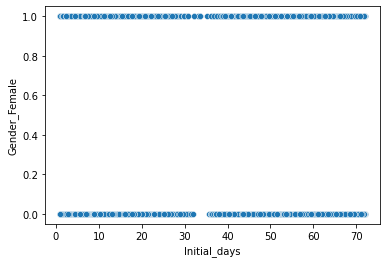

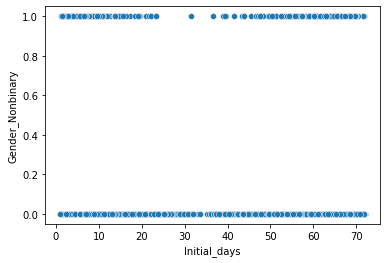

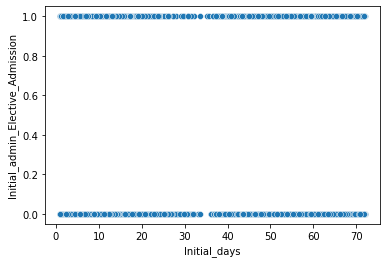

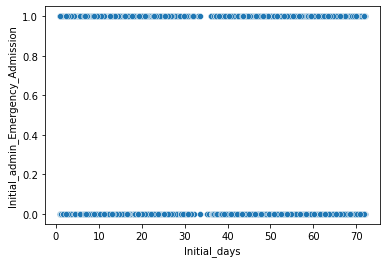

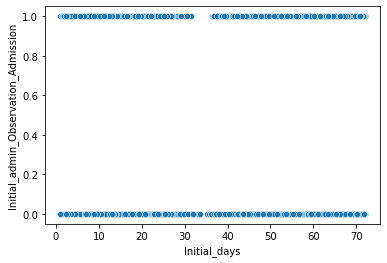

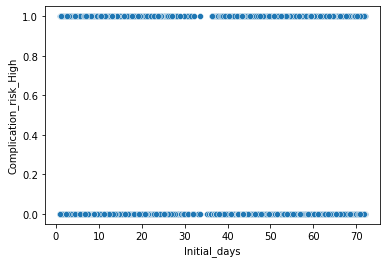

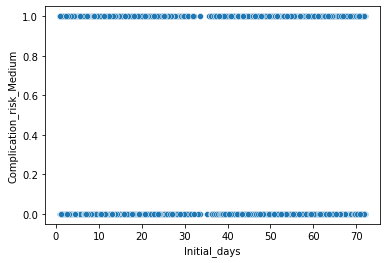

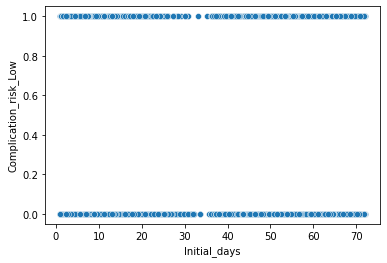

In [8]:
#Bivariate Visualization
sns.scatterplot(data=df, y="vitD_supp", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Children", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Income", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Full_meals_eaten", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Additional_charges", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="TotalCharge", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="VitD_levels", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Age", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Doc_visits", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="HighBlood", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Stroke", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Arthritis", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Diabetes", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Hyperlipidemia", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="BackPain", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Allergic_rhinitis", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Reflux_esophagitis", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Asthma", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Marital_Divorced", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Marital_Married", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Marital_Never_Married", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Marital_Separated", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Marital_Widowed", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Services_Blood_Work", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Services_CT_Scan", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Services_Intravenous", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Services_MRI", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Gender_Male", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Gender_Female", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Gender_Nonbinary", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Initial_admin_Elective_Admission", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Initial_admin_Emergency_Admission", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Initial_admin_Observation_Admission", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Complication_risk_High", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Complication_risk_Medium", x="Initial_days")
plt.show()

sns.scatterplot(data=df, y="Complication_risk_Low", x="Initial_days")
plt.show()

In [9]:
df.to_csv(r'C:\Users\mmorg\Desktop\D208 Assessment Files\Cleaned208data.csv')

In [10]:
mdl_initial_vs_variables = ols("Initial_days ~ vitD_supp + Children + Income + Full_meals_eaten + Additional_charges + TotalCharge + VitD_levels + Age + Doc_visits + HighBlood_numeric + Stroke_numeric + Arthritis_numeric + Diabetes_numeric + Hyperlipidemia_numeric + BackPain_numeric + Allergic_rhinitis_numeric + Reflux_esophagitis_numeric + Asthma_numeric + Marital_Divorced + Marital_Married + Marital_Never_Married + Marital_Separated + Marital_Widowed + Services_Blood_Work + Services_CT_Scan + Services_Intravenous + Services_MRI + Gender_Female + Gender_Male + Gender_Nonbinary + Initial_admin_Elective_Admission + Initial_admin_Emergency_Admission + Initial_admin_Observation_Admission + Complication_risk_High + Complication_risk_Low + Complication_risk_Medium", data=df).fit()

mdl_initial_vs_variables.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.258e+05
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:10:32   Log-Likelihood:                -7060.1
No. Observations:               10000   AIC:                         1.418e+04
Df Residuals:                    9968   BIC:                         1.441e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             -10.8883      0.023   -471.390      0.000     -10.934     -10.843
vitD_supp                               0.0001      0.008      0.019      0.985      -0.015       0.015
Children                               -0.0016      0.002     -0.710      0.478      -0.006       0.003
Income                              -9.605e-09   1.72e-07     -0.056      0.956   -3.48e-07    3.28e-07
Full_meals_eaten                       -0.0042      0.005     -0.861      0.389      -0.014       0.005
Additional_charges                  -2.634e-06   3.03e-06     -0.869      0.385   -8.57e-06    3.31e-06
TotalCharge                             0.0122   2.28e-06   5345.969      0.000       0.012       0.012
VitD_levels                            -0.0017      0.002     -0.702      0.482      -0.006       0.003
Age                                     0.0005      0.001      0.662      0.508      -0.001       0.002
Doc_visits                              0.0009      0.005      0.191      0.848      -0.008       0.010
HighBlood_numeric                      -1.3551      0.028    -48.387      0.000      -1.410      -1.300
Stroke_numeric                          0.0181      0.012      1.463      0.144      -0.006       0.042
Arthritis_numeric                      -0.8892      0.010    -86.563      0.000      -0.909      -0.869
Diabetes_numeric                       -0.9146      0.011    -82.879      0.000      -0.936      -0.893
Hyperlipidemia_numeric                 -1.1332      0.010   -108.907      0.000      -1.154      -1.113
BackPain_numeric                       -1.0474      0.010   -104.629      0.000      -1.067      -1.028
Allergic_rhinitis_numeric              -0.7427      0.010    -73.806      0.000      -0.762      -0.723
Reflux_esophagitis_numeric             -0.7201      0.010    -72.092      0.000      -0.740      -0.701
Asthma_numeric                         -0.0128      0.011     -1.179      0.238      -0.034       0.008
Marital_Divorced                       -2.1805      0.011   -199.011      0.000      -2.202      -2.159
Marital_Married                        -2.1820      0.011   -200.749      0.000      -2.203      -2.161
Marital_Never_Married                  -2.1642      0.011   -199.295      0.000      -2.186      -2.143
Marital_Separated                      -2.1874      0.011   -201.002      0.000      -2.209      -2.166
Marital_Widowed                        -2.1742      0.011   -201.888      0.000      -2.195      -2.153
Services_Blood_Work                    -2.7271      0.010   -264.686      0.000      -2.747      -2.707
Services_CT_Scan                       -2.7189      0.014   -195.632      0.000      -2.746      -2.692
Services_Intravenous                   -2.7327      0.011   -246.55

In [1]:
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Initial_days', 'vitD_supp', 'Children', 'Income', 'Full_meals_eaten', 'Additional_charges', 'TotalCharge', 'VitD_levels', 'Age', 'Doc_visits', 'HighBlood_numeric', 'Stroke_numeric', 'Arthritis_numeric', 'Diabetes_numeric', 'Hyperlipidemia_numeric', 'BackPain_numeric', 'Allergic_rhinitis_numeric', 'Reflux_esophagitis_numeric', 'Asthma_numeric', 'Marital_Divorced', 'Marital_Married', 'Marital_Never_Married', 'Marital_Separated', 'Marital_Widowed', 'Services_Blood_Work', 'Services_CT_Scan', 'Services_Intravenous', 'Services_MRI', 'Gender_Female', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Elective_Admission', 'Initial_admin_Emergency_Admission', 'Initial_admin_Observation_Admission', 'Complication_risk_High', 'Complication_risk_Low', 'Complication_risk_Medium']]


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

NameError: name 'df' is not defined

In [13]:
#Reduced model, dropping variables with infinite VIF
mdl_initial_vs_variables = ols("Initial_days ~ vitD_supp + Children + Income + Full_meals_eaten + Additional_charges + VitD_levels + Age + Doc_visits + HighBlood_numeric + Stroke_numeric + Arthritis_numeric + Diabetes_numeric + Hyperlipidemia_numeric + BackPain_numeric + Allergic_rhinitis_numeric + Reflux_esophagitis_numeric + Asthma_numeric", data=df).fit()

mdl_initial_vs_variables.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.609
Date:                Mon, 21 Nov 2022   Prob (F-statistic):             0.0533
Time:                        12:09:14   Log-Likelihood:                -46874.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9982   BIC:                         9.391e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     34.0439      2.885     11.800      0.000      28.389      39.699
vitD_supp                      0.6559      0.419      1.566      0.117      -0.165       1.477
Children                       0.2781      0.122      2.286      0.022       0.040       0.517
Income                     -1.179e-05   9.23e-06     -1.278      0.201   -2.99e-05     6.3e-06
Full_meals_eaten              -0.4394      0.261     -1.683      0.093      -0.951       0.073
Additional_charges            -0.0002      0.000     -1.159      0.246      -0.000       0.000
VitD_levels                   -0.0441      0.131     -0.338      0.735      -0.300       0.212
Age                            0.0618      0.038      1.624      0.104      -0.013       0.136
Doc_visits                    -0.1814      0.252     -0.720      0.471      -0.675       0.312
HighBlood_numeric              1.2442      1.472      0.845      0.398      -1.642       4.130
Stroke_numeric                -0.0671      0.661     -0.102      0.919      -1.363       1.229
Arthritis_numeric              1.0291      0.549      1.874      0.061      -0.048       2.106
Diabetes_numeric              -0.1275      0.591     -0.216      0.829      -1.285       1.030
Hyperlipidemia_numeric        -0.2355      0.557     -0.423      0.672      -1.327       0.856
BackPain_numeric               0.9249      0.535      1.729      0.084      -0.124       1.974
Allergic_rhinitis_numeric      0.2122      0.538      0.394      0.694      -0.843       1.268
Reflux_esophagitis_numeric     0.6491      0.534      1.215      0.225      -0.398       1.697
Asthma_numeric                -0.7605      0.580     -1.310      0.190      -1.898       0.377
==============================================================================
Omnibus:                    41465.433   Durbin-Watson:                   0.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1277.292
Skew:                           0.070   Prob(JB):                    4.36e-278
Kurtosis:                       1.255   Cond. No.                     5.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Residual Standard Error
np.sqrt(mdl_initial_vs_variables.scale)

26.295731213305718

<AxesSubplot:xlabel='Initial_days'>

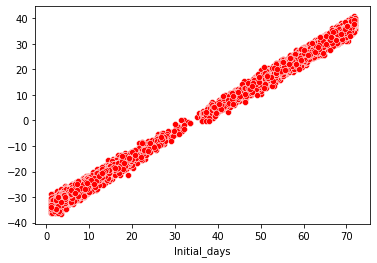

In [15]:
#Residual plot
df['intercept'] = 1
residuals = df['Initial_days'] - mdl_initial_vs_variables.predict(df[['vitD_supp', 'Children', 'Income', 'Full_meals_eaten', 'Additional_charges', 'VitD_levels', 'Age', 'Doc_visits', 'HighBlood_numeric', 'Stroke_numeric', 'Arthritis_numeric', 'Diabetes_numeric', 'Hyperlipidemia_numeric', 'BackPain_numeric', 'Allergic_rhinitis_numeric', 'Reflux_esophagitis_numeric', 'Asthma_numeric']])
sns.scatterplot(x=df['Initial_days'], y=residuals, color='red')